In [1]:
%matplotlib inline
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager
import pandas as pd

## Load some fonts
We will use mplsoccer's FontManager to load some fonts from Google Fonts.
We borrowed the FontManager from the excellent
`ridge_map library <https://github.com/ColCarroll/ridge_map>`_.



In [2]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

In [21]:
#read in data
df=pd.read_csv('SterlingPercentile.csv')
df

,Player,npxG,SoT%,Goals/Shot,xA,Pass Completion%,Passes into Pen Box,Prog. Passes,Passes Under Pressure,Crosses,Shot-Creating Actions,Touches (Pen),Drib Success %,Players Dribbled Past,Prog. Carries,Carries into Pen Box
0,Sterling,99,89,90,60,91,89,43,28,60,66,98,40,79,80,91


In [22]:
params = list(df.columns)
params = params[1:]
params

['npxG',
 'SoT%',
 'Goals/Shot',
 'xA',
 'Pass Completion%',
 'Passes into Pen Box',
 'Prog. Passes',
 'Passes Under Pressure',
 'Crosses',
 'Shot-Creating Actions',
 'Touches (Pen)',
 'Drib Success %',
 'Players Dribbled Past',
 'Prog. Carries',
 'Carries into Pen Box']

In [23]:
#Player value
values=df.loc[df['Player']=='Sterling'].reset_index()
values=list(values.loc[0])
values=values[2:]

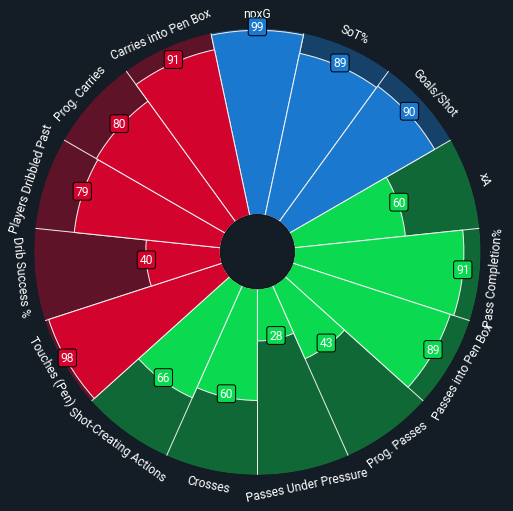

In [31]:
# color for the slices and text
slice_colors = ["#1A78CF"] * 3+["#0BDA51"] * 7+["#D2042D"] * 5
text_colors = ["#FFFFFF"] * 15

#blue - 1A78CF
#red - D2042D
#green - 0BDA51
#orange - FF9300


# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#141d26",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#FFFFFF", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=5,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)


# add text
#fig.text(
#    0.34, 0.925, "Attacking        Possession       Defending", size=14,
#    fontproperties=font_bold.prop, color="#FFFFFF"
#)

# add rectangles
#fig.patches.extend([
#    plt.Rectangle(
#        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
#        transform=fig.transFigure, figure=fig
#    ),
#    plt.Rectangle(
#        (0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
#        transform=fig.transFigure, figure=fig
#    ),
#    plt.Rectangle(
#        (0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
#        transform=fig.transFigure, figure=fig
#    ),
#])

# add image
#ax_image = add_image(
#    fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.100
#)   # these values might differ when you are plotting

plt.show()